<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv')

In [ ]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
df.shape

(51774, 3)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [ ]:
new_df = df.drop_duplicates(subset=['titles'])
new_df.shape

(38972, 3)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
corpus = []
for _, row in new_df.iterrows():
	corpus.append({
		'title': preprocess_text(row['titles']),
		'summaries': preprocess_text(row['summaries']),
		'term': eval(row['terms'])[0],
	})

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = []
for paper in corpus:
    countvec.append(' '.join(paper['title'] + paper['summaries']))

vectorizer = CountVectorizer()
vectorizer.fit(countvec)
doc_word = vectorizer.transform(countvec)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        self.prior = np.bincount(y) / len(y)

        y_unique = np.unique(y)
        self.word_counts = np.zeros((len(y_unique), x.shape[1]))
        for word in y_unique:
            self.word_counts[word] = np.sum(x[y == word], axis=0)

        self.lk_word = (self.word_counts + self.alpha) / (np.sum(self.word_counts, axis=1)[:, np.newaxis] + self.alpha * x.shape[1])

        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        return np.argmax(np.log(self.prior) + np.dot(x, np.log(self.lk_word.T)), axis=1)

In [ ]:
terms, labels = [], []
for paper in corpus:
    if paper['term'] not in labels:
        labels.append(paper['term'])
    terms.append(labels.index(paper['term']))
    
print(labels)

['cs.CV', 'cs.LG', 'stat.ML']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_word.toarray(), terms, train_size=.8)

In [ ]:
# use your classifier to fit on the training data
# then try to predict classes of test data
classifier = NaiveBayes()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy:', accuracy_score(y_test, pred) * 100)
print('- ' * 15)
print('Macro')
print('Recall:', recall_score(y_test, pred, average='macro'))
print('Precision:', precision_score(y_test, pred, average='macro'))
print('F1-score:', f1_score(y_test, pred, average='macro'))
print('- ' * 15)
print('Micro')
print('Recall:', recall_score(y_test, pred, average='micro'))
print('Precision:', precision_score(y_test, pred, average='micro'))
print('F1-score:', f1_score(y_test, pred, average='micro'))

Accuracy: 86.01667735728032
- - - - - - - - - - - - - - - 
Macro
Recall: 0.7231968852321646
Precision: 0.7385408939714369
F1-score: 0.7296838290257622
- - - - - - - - - - - - - - - 
Micro
Recall: 0.8601667735728031
Precision: 0.8601667735728031
F1-score: 0.8601667735728031


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

AUC Score: 0.8951250801796024


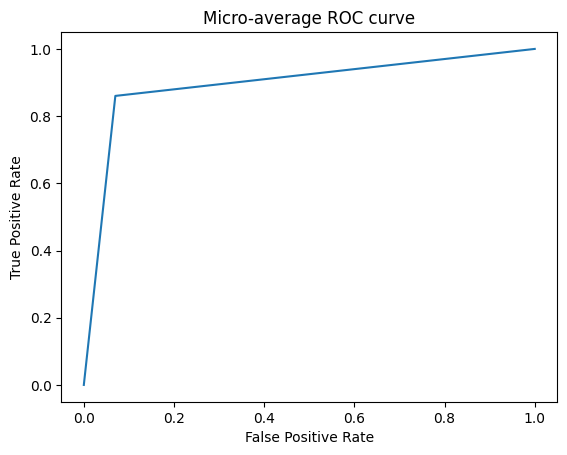

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def binarize(y):
    return label_binarize(y, classes=range(len(labels))).ravel()

print('AUC Score:', roc_auc_score(binarize(y_test), binarize(pred)))
fpr, tpr, _ = roc_curve(binarize(y_test), binarize(pred))

plt.plot(fpr, tpr)
plt.title('Micro-average ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

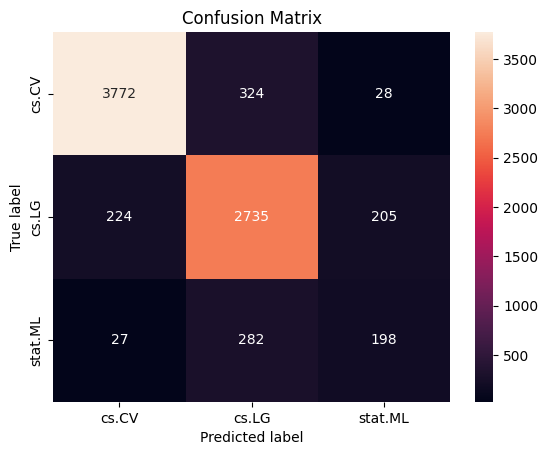

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion = np.zeros((len(labels), len(labels)), dtype=int)
for i in range(len(y_test)):
    confusion[y_test[i]][pred[i]] += 1

sns.heatmap(confusion, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [ ]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data
df = pd.read_csv('https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv')

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [ ]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with open('unsupervised.txt', 'w') as f:
            for line in texts:
                f.write(f'{line}\n')
        self.model = fasttext.train_unsupervised(input='unsupervised.txt', model=self.method)

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        if self.preprocessor:
            query = self.preprocessor(query)
        
        tf_idf_weights = {}
        for word in query:
            try:
                tf_idf_weights[word] = tf_idf_vectorizer.idf_[tf_idf_vectorizer.vocabulary_[word]]
            except:
                tf_idf_weights[word] = 0

        query_embed = np.zeros(self.model.get_dimension())
        for word, weight in tf_idf_weights.items():
            word_embed = self.model.get_word_vector(word)
            query_embed += word_embed * weight
        query_embed /= len(query)
        
        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path='FastText_model.bin'):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_total, mode='train', save=True)

Read 6M words
Number of words:  32287
Number of labels: 0
Progress: 100.0% words/sec/thread:   58498 lr:  0.000000 avg.loss:  2.017162 ETA:   0h 0m 0s


In [ ]:
FastText_model.prepare(preprocessed_total, mode='load')

In [ ]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8158900737762451, "'covid-19',"),
 (0.7615483403205872, "'covid',"),
 (0.7600588202476501, "'covid-19']"),
 (0.7413519620895386, "'covid19',"),
 (0.7084155082702637, "'infects',"),
 (0.6998868584632874, "['covid-19',"),
 (0.6825960278511047, "'opioid',"),
 (0.6824088096618652, "'infections',"),
 (0.6735444068908691, "'pandemic',"),
 (0.6731888651847839, "'infected',")]

In [ ]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        new_data = [' '.join(doc) for doc in data]
        self.vectorizer.fit_transform(new_data)

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [ ]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.15253407, -1.02300964, -3.02834386, -0.35218729,  0.24413511,
       -0.59298259, -2.03012079,  0.58116902, -2.02844223,  0.54616983,
       -0.68051917,  0.24579349, -1.86672413,  0.77555868,  0.89615577,
        2.91805202,  0.15329332,  1.11964077, -0.21889824, -0.26207216,
        2.04842244, -1.43114991,  0.5181585 ,  1.60071459, -0.67232989,
        0.71271938, -0.05870742,  1.03586767, -1.44115372, -2.32897776,
        0.24577661,  1.43534845,  0.09182268, -0.99612916, -1.3005757 ,
       -1.73576975, -1.32664713,  0.12910086,  0.62594837, -0.65662891,
        0.13922615,  0.52565137,  1.36708318, -0.28971669,  0.54488459,
        1.57766064, -0.97492051, -0.57224381, -0.58131801,  0.75691193,
        0.31472159, -0.91314635,  0.02941092,  0.57224888, -1.93307063,
        0.40340308,  0.69882888, -2.14292556,  1.42305425, -0.66084039,
        0.32144749,  0.60452266,  1.59001687, -0.69030112, -1.10087931,
        0.93299711, -1.74633729, -0.48370408,  1.50477463,  0.86


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [ ]:
embeddings = []
for data in preprocessed_total:
    embeddings.append(FastText_model.get_query_embedding(' '.join(data), TF_IDF_model.vectorizer))

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.lables = labels
        
    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, i):
        return self.embeddings[i], self.lables[i]

In [ ]:
terms, labels = [], []
for _, row in df.iterrows():
    term = eval(row['terms'])[0]
    if term not in terms:
        terms.append(term)
    labels.append(terms.index(term))

print(terms)

['cs.CV', 'cs.LG', 'stat.ML']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, train_size=.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8)

train_loader = DataLoader(PapersDataSet(X_train, y_train), batch_size=64)
val_loader = DataLoader(PapersDataSet(X_val, y_val), batch_size=64)
test_loader = DataLoader(PapersDataSet(X_test, y_test), batch_size=64)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super(ClassifierModel, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features, 5),
            nn.LeakyReLU(),
            nn.Linear(5, num_classes),
        )

    def forward(self, x):
        return self.block(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns

def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    predicted_labels, true_labels = [], []
    with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        epoch_loss, epoch_true, epoch_all = 0, 0, 0
        for _, (x, y) in pbar:
            x, y = x.to(device).to(torch.float32), y.to(device)

            out = model(x)
            pred = out.argmax(-1)

            loss = criterion(out, y)
            epoch_loss += loss

            epoch_true += (pred == y).sum()
            epoch_all += len(pred)

            predicted_labels += pred.tolist()
            true_labels += y.tolist()

    eval_loss, accuracy = float(epoch_loss), float(epoch_true / epoch_all)
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')

    if test_mode:
        print('Accuracy:', accuracy * 100)
        print('Loss', eval_loss)
        print('- ' * 15)
        print('Macro')
        print('Recall:', recall_score(true_labels, predicted_labels, average='macro'))
        print('Precision:', precision_score(true_labels, predicted_labels, average='macro'))
        print('F1-score:', f1_score(true_labels, predicted_labels, average='macro'))
        print('- ' * 15)
        print('Micro')
        print('Recall:', recall_score(true_labels, predicted_labels, average='micro'))
        print('Precision:', precision_score(true_labels, predicted_labels, average='micro'))
        print('F1-score:', f1_score(true_labels, predicted_labels, average='micro'))

        confusion = confusion_matrix(true_labels, predicted_labels)
        sns.heatmap(confusion, annot=True, fmt='d', xticklabels=terms, yticklabels=terms)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            x, y = x.to(device).to(torch.float32), label.to(device)
            
            out = model(x)
            pred = out.argmax(-1)

            loss = criterion(out, y)
            train_loss += float(loss)

            epoch_true += (pred == y).sum()
            epoch_all += len(pred)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

100%|██████████| 130/130 [00:00<00:00, 5679.85it/s]


Epoch 1 finished in 0.23s
[Epoch 1]	Train Loss: 0.0100	Validation Loss: 0.0074	 F1 score macro: 0.5648771845719575


100%|██████████| 130/130 [00:00<00:00, 5383.90it/s]


Epoch 2 finished in 0.21s
[Epoch 2]	Train Loss: 0.0069	Validation Loss: 0.0067	 F1 score macro: 0.5767714788921108


100%|██████████| 130/130 [00:00<00:00, 5398.23it/s]


Epoch 3 finished in 0.22s
[Epoch 3]	Train Loss: 0.0064	Validation Loss: 0.0064	 F1 score macro: 0.622472382268843


100%|██████████| 130/130 [00:00<00:00, 5473.94it/s]


Epoch 4 finished in 0.23s
[Epoch 4]	Train Loss: 0.0063	Validation Loss: 0.0064	 F1 score macro: 0.6322946776971784


100%|██████████| 130/130 [00:00<00:00, 4894.74it/s]


Epoch 5 finished in 0.30s
[Epoch 5]	Train Loss: 0.0062	Validation Loss: 0.0063	 F1 score macro: 0.6392456944284138


100%|██████████| 130/130 [00:00<00:00, 5070.96it/s]


Epoch 6 finished in 0.24s
[Epoch 6]	Train Loss: 0.0062	Validation Loss: 0.0063	 F1 score macro: 0.6412474128750837


100%|██████████| 130/130 [00:00<00:00, 5009.87it/s]


Epoch 7 finished in 0.24s
[Epoch 7]	Train Loss: 0.0062	Validation Loss: 0.0063	 F1 score macro: 0.6443535084504348


100%|██████████| 130/130 [00:00<00:00, 5793.98it/s]


Epoch 8 finished in 0.22s
[Epoch 8]	Train Loss: 0.0062	Validation Loss: 0.0063	 F1 score macro: 0.6468153477098979


100%|██████████| 130/130 [00:00<00:00, 5538.27it/s]


Epoch 9 finished in 0.21s
[Epoch 9]	Train Loss: 0.0061	Validation Loss: 0.0063	 F1 score macro: 0.649731018362369


100%|██████████| 130/130 [00:00<00:00, 5498.01it/s]


Epoch 10 finished in 0.22s
[Epoch 10]	Train Loss: 0.0061	Validation Loss: 0.0063	 F1 score macro: 0.6503262949597036


100%|██████████| 130/130 [00:00<00:00, 5653.40it/s]


Epoch 11 finished in 0.21s
[Epoch 11]	Train Loss: 0.0061	Validation Loss: 0.0063	 F1 score macro: 0.6522052890759752


100%|██████████| 130/130 [00:00<00:00, 5557.46it/s]


Epoch 12 finished in 0.23s
[Epoch 12]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6515720760197469


100%|██████████| 130/130 [00:00<00:00, 5165.45it/s]


Epoch 13 finished in 0.24s
[Epoch 13]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6536928272612798


100%|██████████| 130/130 [00:00<00:00, 5585.42it/s]


Epoch 14 finished in 0.23s
[Epoch 14]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.653734010382839


100%|██████████| 130/130 [00:00<00:00, 4684.00it/s]


Epoch 15 finished in 0.26s
[Epoch 15]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6577274207153395


100%|██████████| 130/130 [00:00<00:00, 5426.60it/s]


Epoch 16 finished in 0.26s
[Epoch 16]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6593800081501334


100%|██████████| 130/130 [00:00<00:00, 5512.68it/s]


Epoch 17 finished in 0.22s
[Epoch 17]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6602488082684861


100%|██████████| 130/130 [00:00<00:00, 5503.17it/s]


Epoch 18 finished in 0.24s
[Epoch 18]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6600548516612524


100%|██████████| 130/130 [00:00<00:00, 5653.40it/s]


Epoch 19 finished in 0.22s
[Epoch 19]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6621080504566669


100%|██████████| 130/130 [00:00<00:00, 5507.34it/s]


Epoch 20 finished in 0.22s
[Epoch 20]	Train Loss: 0.0061	Validation Loss: 0.0062	 F1 score macro: 0.6622680845357644


100%|██████████| 130/130 [00:00<00:00, 5440.90it/s]


Epoch 21 finished in 0.22s
[Epoch 21]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6619144196090797


100%|██████████| 130/130 [00:00<00:00, 5636.92it/s]


Epoch 22 finished in 0.24s
[Epoch 22]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6599310971122525


100%|██████████| 130/130 [00:00<00:00, 5576.79it/s]


Epoch 23 finished in 0.22s
[Epoch 23]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6629053140744234


100%|██████████| 130/130 [00:00<00:00, 5742.29it/s]


Epoch 24 finished in 0.21s
[Epoch 24]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.663551446982822


100%|██████████| 130/130 [00:00<00:00, 5217.10it/s]


Epoch 25 finished in 0.28s
[Epoch 25]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6669136110406656


100%|██████████| 130/130 [00:00<00:00, 5871.21it/s]


Epoch 26 finished in 0.22s
[Epoch 26]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6683796763281046


100%|██████████| 130/130 [00:00<00:00, 5091.60it/s]


Epoch 27 finished in 0.23s
[Epoch 27]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6691261416652151


100%|██████████| 130/130 [00:00<00:00, 5185.69it/s]


Epoch 28 finished in 0.24s
[Epoch 28]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6691261416652151


100%|██████████| 130/130 [00:00<00:00, 5456.63it/s]


Epoch 29 finished in 0.23s
[Epoch 29]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6688050875842059


100%|██████████| 130/130 [00:00<00:00, 5328.49it/s]


Epoch 30 finished in 0.23s
[Epoch 30]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6688746866592045


100%|██████████| 130/130 [00:00<00:00, 5254.45it/s]


Epoch 31 finished in 0.24s
[Epoch 31]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6687668791539582


100%|██████████| 130/130 [00:00<00:00, 5764.21it/s]


Epoch 32 finished in 0.22s
[Epoch 32]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6681867747478073


100%|██████████| 130/130 [00:00<00:00, 5661.33it/s]


Epoch 33 finished in 0.22s
[Epoch 33]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6699080851495435


100%|██████████| 130/130 [00:00<00:00, 5295.27it/s]


Epoch 34 finished in 0.27s
[Epoch 34]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6699988340554843


100%|██████████| 130/130 [00:00<00:00, 5655.16it/s]


Epoch 35 finished in 0.24s
[Epoch 35]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6696881387049601


100%|██████████| 130/130 [00:00<00:00, 5630.69it/s]


Epoch 36 finished in 0.21s
[Epoch 36]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6698485420889772


100%|██████████| 130/130 [00:00<00:00, 5258.50it/s]


Epoch 37 finished in 0.23s
[Epoch 37]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6716771719217046


100%|██████████| 130/130 [00:00<00:00, 5567.45it/s]


Epoch 38 finished in 0.21s
[Epoch 38]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.673287461297856


100%|██████████| 130/130 [00:00<00:00, 5726.07it/s]


Epoch 39 finished in 0.21s
[Epoch 39]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6731966848614667


100%|██████████| 130/130 [00:00<00:00, 5648.25it/s]


Epoch 40 finished in 0.21s
[Epoch 40]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6733782281974136


100%|██████████| 130/130 [00:00<00:00, 5406.26it/s]


Epoch 41 finished in 0.23s
[Epoch 41]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6739724645638715


100%|██████████| 130/130 [00:00<00:00, 5555.48it/s]


Epoch 42 finished in 0.22s
[Epoch 42]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6740632229365092


100%|██████████| 130/130 [00:00<00:00, 4966.39it/s]


Epoch 43 finished in 0.23s
[Epoch 43]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6735579462902385


100%|██████████| 130/130 [00:00<00:00, 5494.13it/s]


Epoch 44 finished in 0.24s
[Epoch 44]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6744498886475244


100%|██████████| 130/130 [00:00<00:00, 5689.74it/s]


Epoch 45 finished in 0.25s
[Epoch 45]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6743590844973876


100%|██████████| 130/130 [00:00<00:00, 5531.42it/s]


Epoch 46 finished in 0.23s
[Epoch 46]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.67423166718216


100%|██████████| 130/130 [00:00<00:00, 5261.04it/s]


Epoch 47 finished in 0.22s
[Epoch 47]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.67423166718216


100%|██████████| 130/130 [00:00<00:00, 5267.04it/s]


Epoch 48 finished in 0.23s
[Epoch 48]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6732605177614727


100%|██████████| 130/130 [00:00<00:00, 5721.39it/s]


Epoch 49 finished in 0.21s
[Epoch 49]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6731451560700944


100%|██████████| 130/130 [00:00<00:00, 5485.23it/s]

Epoch 50 finished in 0.22s
[Epoch 50]	Train Loss: 0.0060	Validation Loss: 0.0062	 F1 score macro: 0.6742422220548834


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

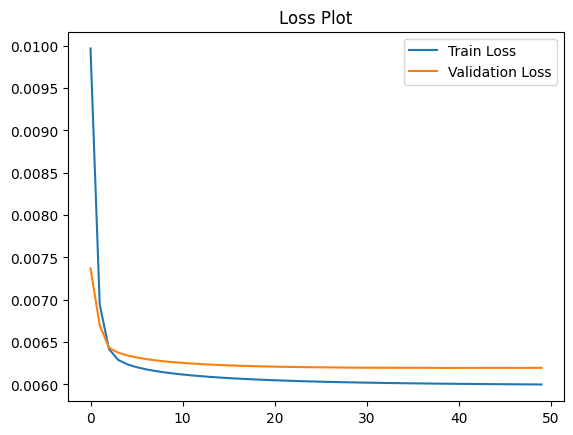

In [ ]:
plt.title('Loss Plot')
plt.plot(train_loss_arr)
plt.plot(val_loss_arr)
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

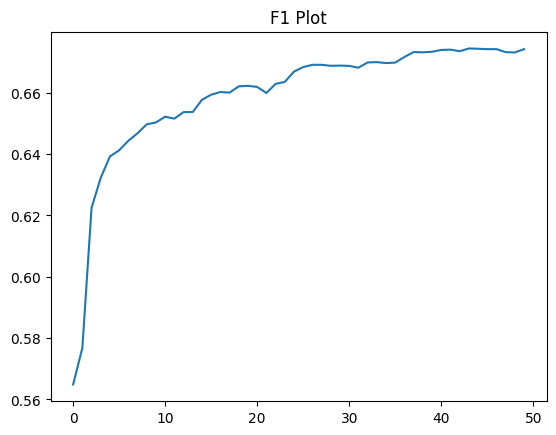

In [ ]:
plt.plot(f1_macro_scores)
plt.title('F1 Plot')
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

100%|██████████| 162/162 [00:00<00:00, 4645.17it/s]

Accuracy: 85.1086437702179
Loss 62.18359375
- - - - - - - - - - - - - - - 
Macro
Recall: 0.6583200115779816
Precision: 0.7350392644721798
F1-score: 0.6758776895628258
- - - - - - - - - - - - - - - 
Micro
Recall: 0.8510864316755191
Precision: 0.8510864316755191
F1-score: 0.8510864316755191


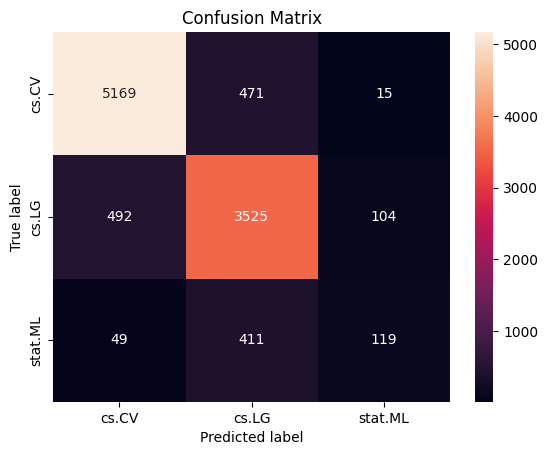

In [ ]:
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    text = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)

    model.eval()
    with torch.no_grad():
        x = torch.Tensor(text).to(device).to(torch.float32)
        predicted_class = terms[model(x).argmax(-1)]

    return predicted_class

In [ ]:
predict('hardware and computerc architecture is good')

'cs.LG'

In [ ]:
PATH = 'nn_fasttext_model.pt'

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [1]:
!pip install transformers==4.28.0
!pip install --upgrade accelerate

import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [3]:
# read data
df = pd.read_csv('https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv')

In [4]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [5]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df.head()

,titles,summaries,terms,preprocessed_abstract,preprocessed_title
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']","[stereo, matching, one, widely, used, techniqu...","[survey, semantic, stereo, matching, semantic,..."
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']","[recent, advancements, artificial, intelligenc...","[future-ai, guiding, principles, consensus, re..."
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']","[paper, proposed, novel, mutual, consistency, ...","[enforcing, mutual, consistency, hard, regions..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],"[consistency, training, proven, advanced, semi...","[parameter, decoupling, strategy, semi-supervi..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']","[ensure, safety, automated, driving, correct, ...","[background-foreground, segmentation, interior..."


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [6]:
terms, labels = [], []
for _, row in df.iterrows():
    term = eval(row['terms'])[0]
    if term not in terms:
        terms.append(term)
    labels.append(terms.index(term))

final_texts = list(' '.join(text) for text in df['preprocessed_title'] + df['preprocessed_abstract'])

X, y = list(zip(*random.sample(list(zip(final_texts, labels)), 10000)))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [7]:
model_name = 'bert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)
model_2 = BertForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [8]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

In [9]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

In [10]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    f1_score_macro = f1_score(labels, preds, average='macro')
    f1_score_micro = f1_score(labels, preds, average='micro')

    return {
        'Accuracy': accuracy,
        'F1 macro': f1_score_macro,
        'F1 micro': f1_score_micro,
    }

In [16]:
# fine tune bert and train model
training_args = TrainingArguments(
    output_dir='result_model',
    evaluation_strategy='steps',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=20,
    weight_decay=.01,
    num_train_epochs=3,
    warmup_steps=500,
    logging_dir='log_model',
    logging_steps=400,
    save_steps=400,
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 macro,F1 micro
400,0.541400,0.358349,0.871000,0.596528,0.871000
800,0.360100,0.346867,0.869500,0.745792,0.869500
1200,0.281900,0.392814,0.882000,0.767485,0.882000


TrainOutput(global_step=1500, training_loss=0.36429452006022134, metrics={'train_runtime': 1941.3752, 'train_samples_per_second': 12.362, 'train_steps_per_second': 0.773, 'total_flos': 5254046060256000.0, 'train_loss': 0.36429452006022134, 'epoch': 3.0})

In [17]:
# freeze bert weights and then train model_2
for param in model_2.bert.parameters():
    param.requires_grad = False

training_args_2 = TrainingArguments(
    output_dir='result_model_2',
    evaluation_strategy='steps',
    per_device_train_batch_size=24,
    per_device_eval_batch_size=30,
    weight_decay=0.05,
    num_train_epochs=3,
    warmup_steps=500,
    logging_dir='log_model_2',
    logging_steps=400,
    save_steps=400,
    load_best_model_at_end=True,
)

trainer_2 = Trainer(
    model=model_2,
    args=training_args_2,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer_2.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 macro,F1 micro
400,0.949400,0.879882,0.543500,0.237097,0.543500
800,0.854000,0.860644,0.544000,0.234888,0.544000


TrainOutput(global_step=1002, training_loss=0.8912060065659696, metrics={'train_runtime': 726.2059, 'train_samples_per_second': 33.048, 'train_steps_per_second': 1.38, 'total_flos': 5254046060256000.0, 'train_loss': 0.8912060065659696, 'epoch': 3.0})

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [18]:
trainer.evaluate()
pred = trainer.predict(test_dataset)[0]

In [19]:
trainer_2.evaluate()
pred_2 = trainer_2.predict(test_dataset)[0]

In [34]:
# you can add more cells here if you need
y_pred_transformers = np.argmax(pred, axis=1)
y_pred_transformers_2 = np.argmax(pred_2, axis=1)

In [35]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns

First Model
- - - - - - - - - - - - - - - 
Accuracy: 0.8695
- - - - - - - - - - - - - - - 
Macro
Recall: 0.732485202705791
Precision: 0.7699813688334324
F1-score: 0.7457924040590708
- - - - - - - - - - - - - - - 
Micro
Recall: 0.8695
Precision: 0.8695
F1-score: 0.8695


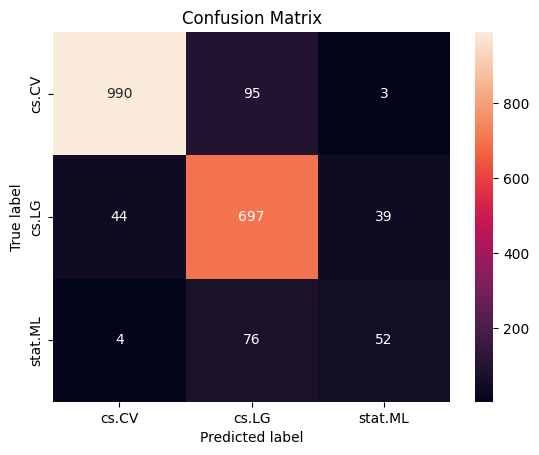

In [36]:
print('First Model')
print('- ' * 15)
print('Accuracy:', accuracy_score(y_test, y_pred_transformers))
print('- ' * 15)
print('Macro')
print('Recall:', recall_score(y_test, y_pred_transformers, average='macro'))
print('Precision:', precision_score(y_test, y_pred_transformers, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_transformers, average='macro'))
print('- ' * 15)
print('Micro')
print('Recall:', recall_score(y_test, y_pred_transformers, average='micro'))
print('Precision:', precision_score(y_test, y_pred_transformers, average='micro'))
print('F1-score:', f1_score(y_test, y_pred_transformers, average='micro'))

confusion = confusion_matrix(y_test, y_pred_transformers)
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=terms, yticklabels=terms)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Second Model
- - - - - - - - - - - - - - - 
Accuracy: 0.544
- - - - - - - - - - - - - - - 
Macro
Recall: 0.3333333333333333
Precision: 0.18133333333333335
F1-score: 0.23488773747841107
- - - - - - - - - - - - - - - 
Micro
Recall: 0.544
Precision: 0.544
F1-score: 0.544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


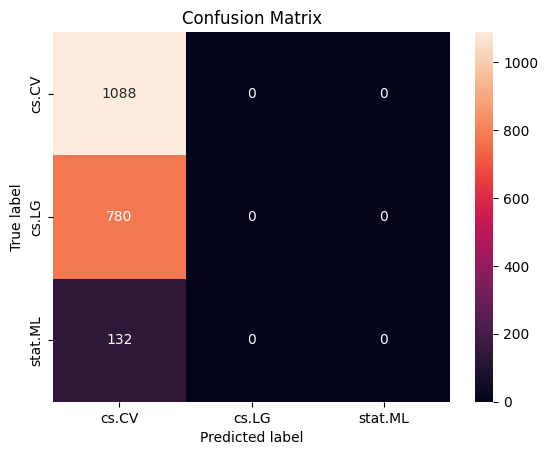

In [37]:
print('Second Model')
print('- ' * 15)
print('Accuracy:', accuracy_score(y_test, y_pred_transformers_2))
print('- ' * 15)
print('Macro')
print('Recall:', recall_score(y_test, y_pred_transformers_2, average='macro'))
print('Precision:', precision_score(y_test, y_pred_transformers_2, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_transformers_2, average='macro'))
print('- ' * 15)
print('Micro')
print('Recall:', recall_score(y_test, y_pred_transformers_2, average='micro'))
print('Precision:', precision_score(y_test, y_pred_transformers_2, average='micro'))
print('F1-score:', f1_score(y_test, y_pred_transformers_2, average='micro'))

confusion = confusion_matrix(y_test, y_pred_transformers_2)
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=terms, yticklabels=terms)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [38]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    encoded = tokenizer(x, truncation=True, padding=True, max_length=512, return_tensors='pt')

    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)

    pred = torch.max(model(input_ids, attention_mask)[0], dim=1)[1]
    return np.array(terms)[pred.to('cpu').numpy()][0]

In [39]:
predict('hardware is very good.', model)

'cs.LG'

In [40]:
# It is highly recommended to save your final models
model.save_pretrained('model')
model_2.save_pretrained('model_2')
tokenizer.save_pretrained('tokenizer')

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [11]:
corpus = []
for _, row in df.iterrows():
	corpus.append({
		'title': preprocess_text(row['titles']),
		'summaries': preprocess_text(row['summaries']),
		'term': eval(row['terms'])[0],
	})

In [12]:
from collections import defaultdict

def construct_positional_indexes(corpus : str):
    """
    Get processed data and insert words in that into a trie and construct postional_index and posting lists after wards.

    Parameters
    ----------
    corpus: str
        processed data 
    
    Return
    ----------
    docs: 
        list of docs with specificied id, title, abstract.
    """
    postional_index = defaultdict(lambda: defaultdict(lambda: {'title': [], 'summaries': []}))
    for paper_id, details in enumerate(corpus):
        for label in ['title', 'summaries']:
            for index, token in enumerate(details[label]):
                postional_index[token][paper_id][label].append(index)

    return postional_index

docs = construct_positional_indexes(corpus)

In [13]:
import math

def get_idf(token):
    df = len(docs[token])
    return math.log10(len(corpus) / (df + 1))

def get_logarithmic_tf(tf):
    return 1 + math.log10(tf) if tf else 0

def get_doc_scores(query_count, method, where):
    doc_scores = defaultdict(int)
    norm_factors = defaultdict(int)
    average_doc_length = sum(len(details[where]) for details in corpus)

    for token, count in query_count.items():
        if token not in docs:
            continue

        for paper_id, details in docs[token].items():
            if not details[where]:
                continue

            if method == 'ltn-lnn' or method == 'ltc-lnc':
                doc_coeff = get_idf(token) * get_logarithmic_tf(len(details[where]))
                doc_scores[paper_id] += get_logarithmic_tf(count) * doc_coeff

                if method == 'ltc-lnc':
                    norm_factors[paper_id] += doc_coeff ** 2

            if method == 'okapi25':
                k1, b = 1.5, .75
                tf_token = len(details[where])
                doc_scores[paper_id] += (k1 + 1) * get_idf(token) * tf_token / (k1 * (1 - b * (1 - len(corpus[paper_id][where]) / average_doc_length)) + tf_token)
                pass

    if method == 'ltc-lnc':
        for paper_id in doc_scores:
            doc_scores[paper_id] /= math.sqrt(norm_factors[paper_id])
    return doc_scores

In [14]:
def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    title = preprocess_text(title_query)
    abstract = preprocess_text(abstract_query)

    title_count = defaultdict(int)
    abstract_count = defaultdict(int)
    for token in title:
        title_count[token] += 1
    for token in abstract:
        abstract_count[token] += 1

    title_doc_score = get_doc_scores(title_count, method, 'title')
    abstract_doc_score = get_doc_scores(abstract_count, method, 'summaries')

    total_doc_scores = {}
    for paper_id in range(len(corpus)):
        title_score = title_doc_score[paper_id] if category != 'summaries' else 0
        abstract_score = abstract_doc_score[paper_id] if category != 'title' else 0
        total_doc_scores[paper_id] = weight * title_score + (1 - weight) * abstract_score

    result = sorted(list(range(len(corpus))), key=lambda paper_id: total_doc_scores[paper_id], reverse=True)
    if category != 'all':
        result = list(filter(lambda paper_id: corpus[paper_id]['term'] == category, result))
    return result[:max_result_count]

In [15]:
search('Transtation Model Baxed on Dep Lerning', 'Trandlation Moxel Basef on Deep Learning', 5, method='ltc-lnc')

[8487, 31188, 34160, 9814, 2158]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [ ]:
from transformers import BertModel, BertTokenizerFast

In [ ]:
model_name = 'bert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = BertTokenizerFast.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
## ؟ points

from typing import List

def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    embedding = []
    with torch.no_grad():
        for doc in doc_list:
            inputs = tokenizer(doc, return_tensors='pt').to(device)
            last_hidden_states = bert_model(**inputs, output_hidden_states=True).hidden_states[-1]
            embedding.append(last_hidden_states[0,0,:].detach().cpu().numpy())

    return np.array(embedding)

docs_embedding = extract_embedding(final_texts)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [ ]:
## ؟ points

from sklearn.manifold import TSNE
from typing import List

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """
    tsne = TSNE(n_components=2)
    return tsne.fit_transform(emb_vecs)

docs_embedding_2d = convert_to_2d_tsne(docs_embedding)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



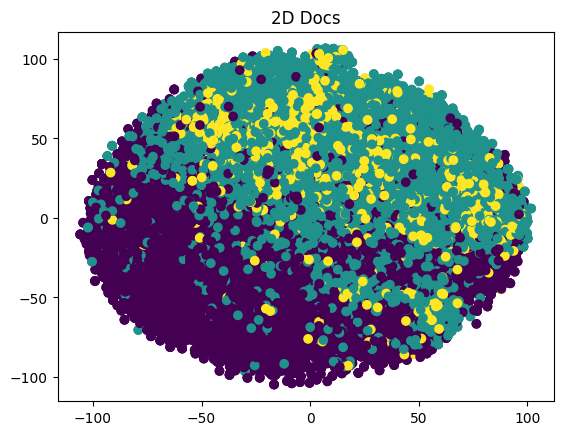

In [ ]:
## ؟ points

from typing import List

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """
    plt.scatter(emb_vecs_2d[:, 0], emb_vecs_2d[:, 1], c=labels)
    plt.title('2D Docs')
    plt.show()

plot_docs(docs_embedding_2d, labels)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

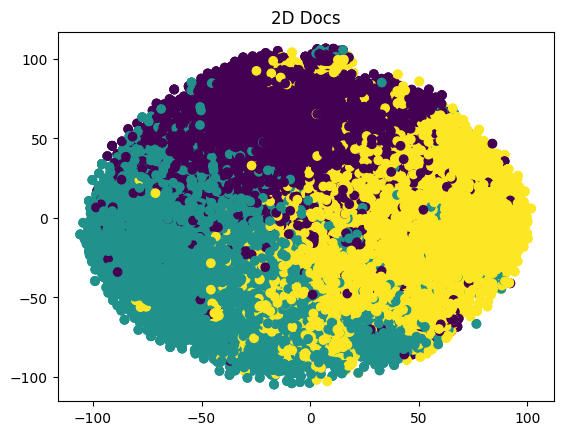

In [ ]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    number_of_docs = emb_vecs.shape[0]
    cluster_centers = emb_vecs[np.random.choice(number_of_docs, n_clusters, replace=False)]
    cluster_labels = np.ones(number_of_docs, dtype=int) * -1

    for _ in range(100):
        for i in range(number_of_docs):
            cluster_labels[i] = np.argmin([np.linalg.norm(emb_vecs[i] - cluster_centers[j]) for j in range(n_clusters)])
        for i in range(n_clusters):
            cluster_centers[i] = np.mean([emb_vecs[j] for j in range(number_of_docs) if cluster_labels[j] == i], axis=0)

    return cluster_centers, cluster_labels

cluster_centers, cluster_labels = cluster_kmeans(docs_embedding, len(terms))
plot_docs(docs_embedding_2d, cluster_labels)

K = 2


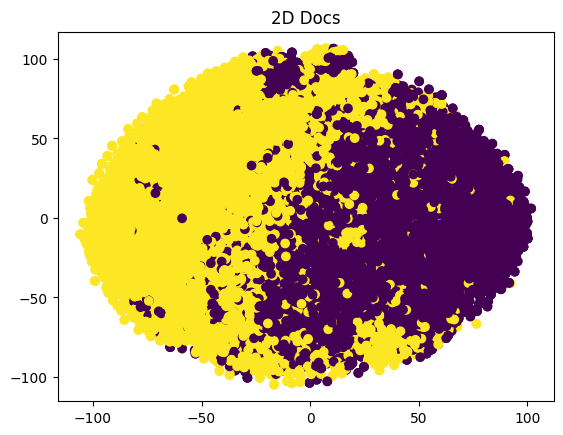

K = 3


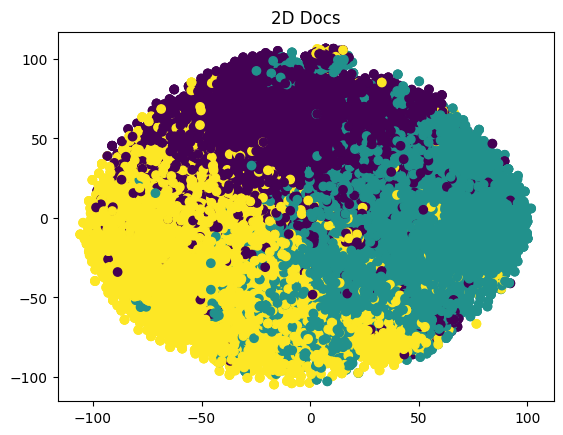

K = 4


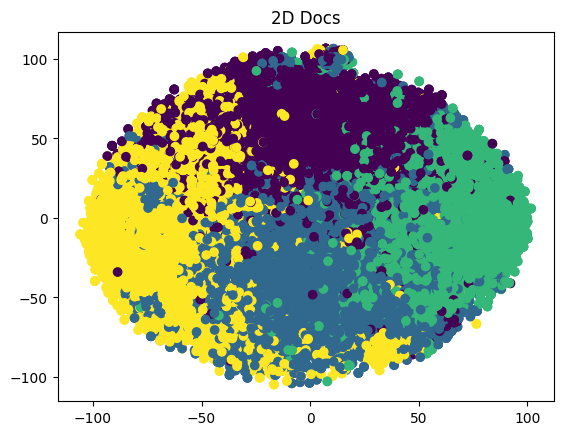

K = 5


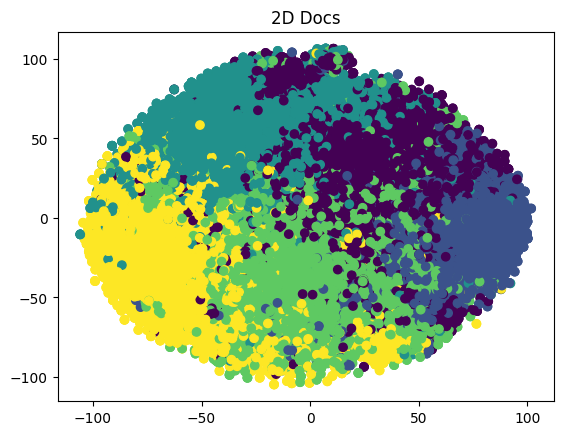

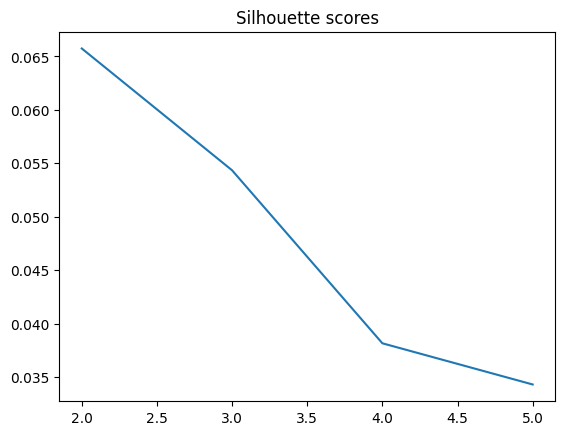

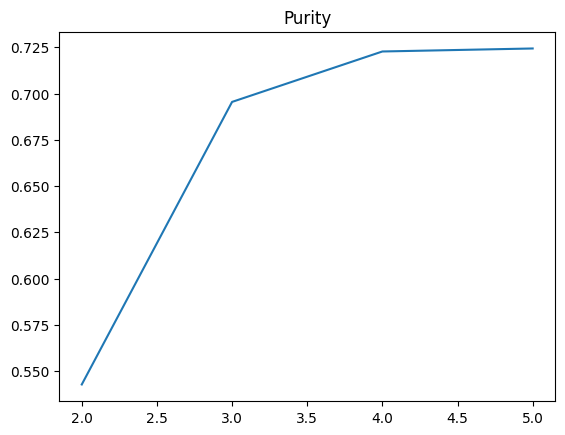

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = list(range(2, 6))

purities = []
silhouette_scores = []
for k in K:
    cluster_centers, cluster_labels = cluster_kmeans(docs_embedding, k)

    print('K =', k)
    plot_docs(docs_embedding_2d, cluster_labels)
    silhouette_scores.append(silhouette_score(docs_embedding, cluster_labels))

    confusion = confusion_matrix(labels, cluster_labels)
    purities.append(np.sum(np.amax(confusion, axis=0)) / np.sum(confusion))

plt.plot(K, silhouette_scores)
plt.title('Silhouette scores')
plt.show()

plt.plot(K, purities)
plt.title('Purity')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=3>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

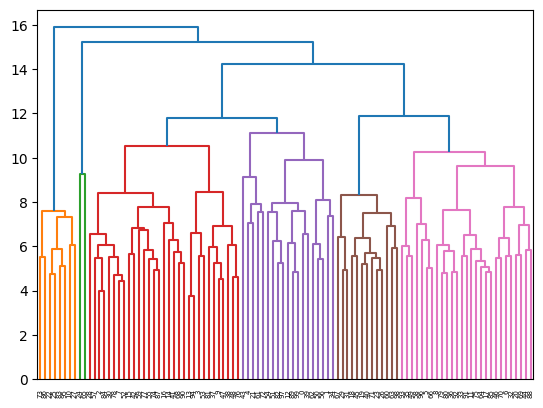

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

Z = shc.linkage(docs_embedding[:100], 'ward')
dn = shc.dendrogram(Z)
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """
    input_doc = emb_vecs[input_doc_index]
    docs_similarity = np.linalg.norm(emb_vecs - input_doc, axis=1)

    result = np.argsort(docs_similarity)
    return result[result != input_doc_index][:num_of_similar_docs]

find_similar_docs(6, 5, docs_embedding)

array([ 4824, 17710, 10356, 43485,  7386])